# General Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, matplotlib.image as mpimg
import seaborn as sns
from scipy import stats

%matplotlib inline

In [2]:
df = pd.read_csv("mnist.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


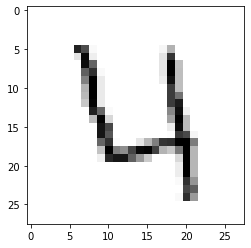

In [4]:
input_data = np.array(df.drop(["label"], axis=1))
digit_image = input_data[3].reshape(28, 28)
plt.imshow(digit_image, cmap = 'binary')
plt.show()

In [5]:
labels = df["label"]
for i in range(0,10):
    count_i = labels[labels == i]
    precentege = count_i.count()/labels.count() * 100 
    print("Label {}: {:0.2f}%".format(i, precentege))

Label 0: 9.84%
Label 1: 11.15%
Label 2: 9.95%
Label 3: 10.36%
Label 4: 9.70%
Label 5: 9.04%
Label 6: 9.85%
Label 7: 10.48%
Label 8: 9.67%
Label 9: 9.97%


(array([4132.,    0.,    0.,    0.,    0., 4684.,    0.,    0.,    0.,
           0.,    0., 4177.,    0.,    0.,    0.,    0., 4351.,    0.,
           0.,    0.,    0.,    0., 4072.,    0.,    0.,    0.,    0.,
        3795.,    0.,    0.,    0.,    0.,    0., 4137.,    0.,    0.,
           0.,    0., 4401.,    0.,    0.,    0.,    0.,    0., 4063.,
           0.,    0.,    0.,    0., 4188.]),
 array([0.  , 0.18, 0.36, 0.54, 0.72, 0.9 , 1.08, 1.26, 1.44, 1.62, 1.8 ,
        1.98, 2.16, 2.34, 2.52, 2.7 , 2.88, 3.06, 3.24, 3.42, 3.6 , 3.78,
        3.96, 4.14, 4.32, 4.5 , 4.68, 4.86, 5.04, 5.22, 5.4 , 5.58, 5.76,
        5.94, 6.12, 6.3 , 6.48, 6.66, 6.84, 7.02, 7.2 , 7.38, 7.56, 7.74,
        7.92, 8.1 , 8.28, 8.46, 8.64, 8.82, 9.  ]),
 <a list of 1 Patch objects>)

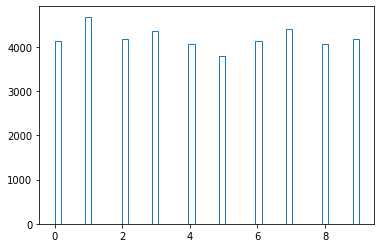

In [6]:
plt.hist(labels, bins=50, histtype='step')

In [7]:
input_data = np.array(df.drop(["label"], axis=1))
input_data[input_data < 130] = 0

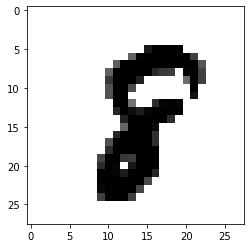

In [8]:
digit_image = input_data[1023].reshape(28, 28)
plt.imshow(digit_image, cmap = 'binary')
plt.show()

In [9]:
new_df = df 
new_df["density"] = new_df.astype(bool).sum(axis=1)

In [10]:
new_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,density
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,98
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,245
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,80
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,114
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,260


In [11]:
DF_Label_Density = new_df.iloc[:, [0,-1]]

In [12]:
DF_Label_Density.head()

,label,density
0,1,98
1,0,245
2,1,80
3,4,114
4,0,260


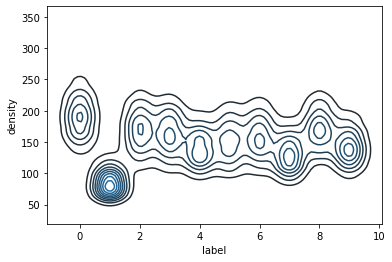

In [13]:
sns.kdeplot(DF_Label_Density["label"], DF_Label_Density["density"], )

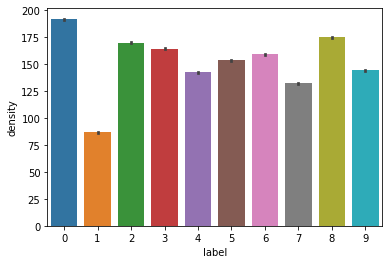

In [14]:
sns.barplot(x="label", y="density", data=DF_Label_Density, ci=68)

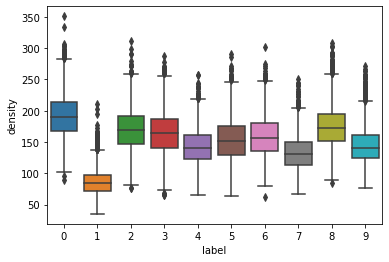

In [15]:
sns.boxplot(x="label", y="density", data=DF_Label_Density)

In [16]:
label = 9
DF_Label_Density['density'][DF_Label_Density['label'] == label].mean()

144.25143266475644

In [17]:
def density_analyse(data):
    mean_diff = []
    for i in range(0, 10):
        for j in range(0, 10):
            if j != i:
                mean_dense_i = DF_Label_Density['density'][DF_Label_Density['label'] == i].mean()
                mean_dense_j = DF_Label_Density['density'][DF_Label_Density['label'] == j].mean()
                mean_difference = abs(mean_dense_i - mean_dense_j)
                mean_diff.append([mean_difference, j, i])
    
    data_frame = pd.DataFrame(mean_diff, columns=["dens_diff", "label_x", "label_y"])
    sorted_df = data_frame.sort_values(by='dens_diff')
                
    return sorted_df.iloc[::2], np.array(sorted_df.iloc[1:2]).reshape(3), np.array(sorted_df.iloc[-2:-1]).reshape(3) 

In [18]:
mean_diff, min_diff, max_diff = density_analyse(DF_Label_Density)

print("Max mean density difference {:0.0f} between {} and {}".format(max_diff[0], int(max_diff[1]), int(max_diff[2])))
print("Min mean density difference {:0.0f} between {} and {}".format(min_diff[0], int(min_diff[1]), int(min_diff[2])))


Max mean density difference 105 between 0 and 1
Min mean density difference 2 between 4 and 9


In [19]:
mean_diff

,dens_diff,label_x,label_y
44,1.751924,9,4
25,5.005499,8,2
32,5.309825,6,3
29,5.448039,2,3
50,5.454588,6,5
86,9.504035,5,9
67,10.078468,4,7
34,10.453538,8,3
23,10.757864,6,2
48,10.764413,3,5


# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
LR = LogisticRegression()

X = np.array(DF_Label_Density["density"]).reshape(-1, 1)
X = scale(X)
y = DF_Label_Density["label"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
LR.fit(X_train, y_train)

In [ ]:
prediction = LR.predict(X_test)

In [ ]:
accuracy_score(y_test, prediction)

In [ ]:
scores = cross_val_score(LR, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))